# **Wiktor Ciołek LSED lab6 31.05.2024**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True

c:\Users\cp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\cp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

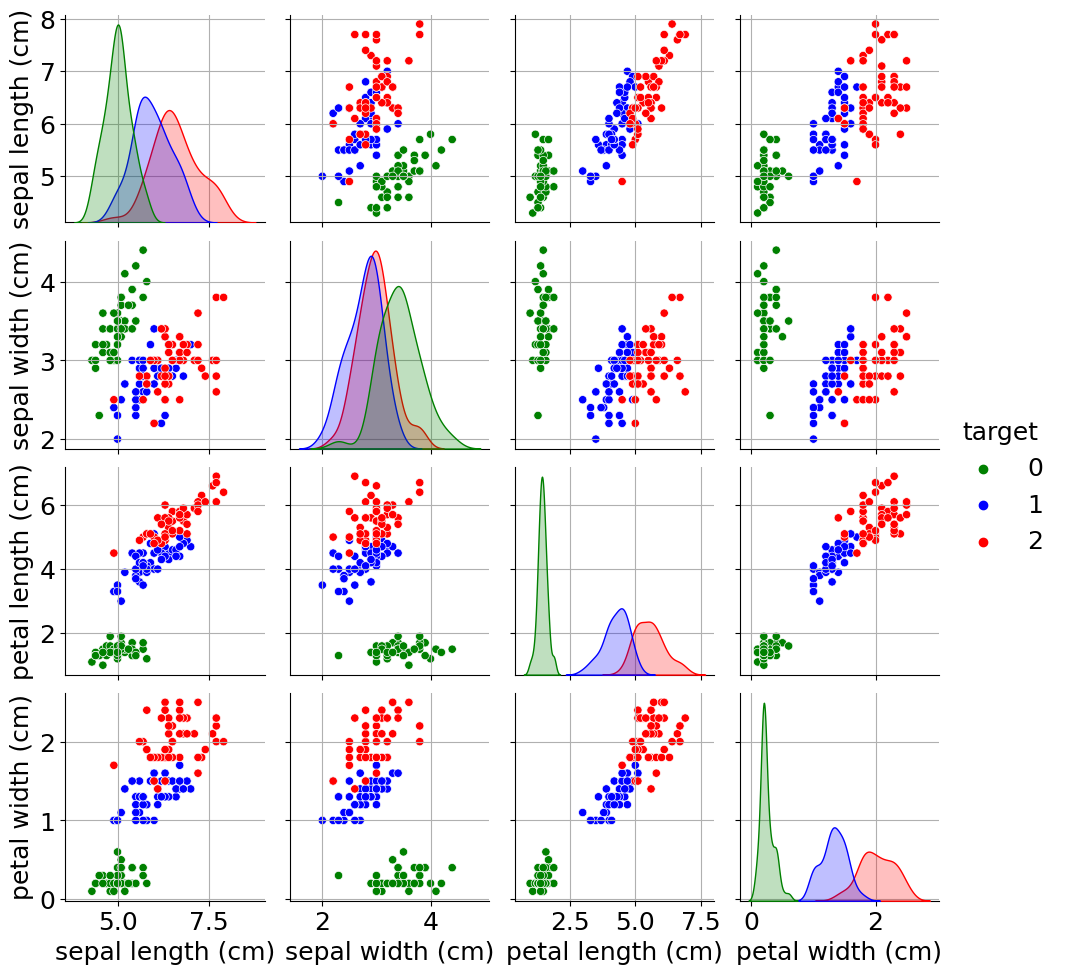

In [52]:
from sklearn.datasets import load_iris

data, target = load_iris(as_frame=True, return_X_y=True)
data['target'] = target

sns.pairplot(data, hue='target', palette=['green', 'blue', 'red'])
X = data.iloc[:, :-1]
y = data.target


# Scaler choice
We see that for one estimator, the best score is obtain when no scaling is used. Next, we will use none then. Distance metric and num. of neighbours will be chosen.

Best nn is 5


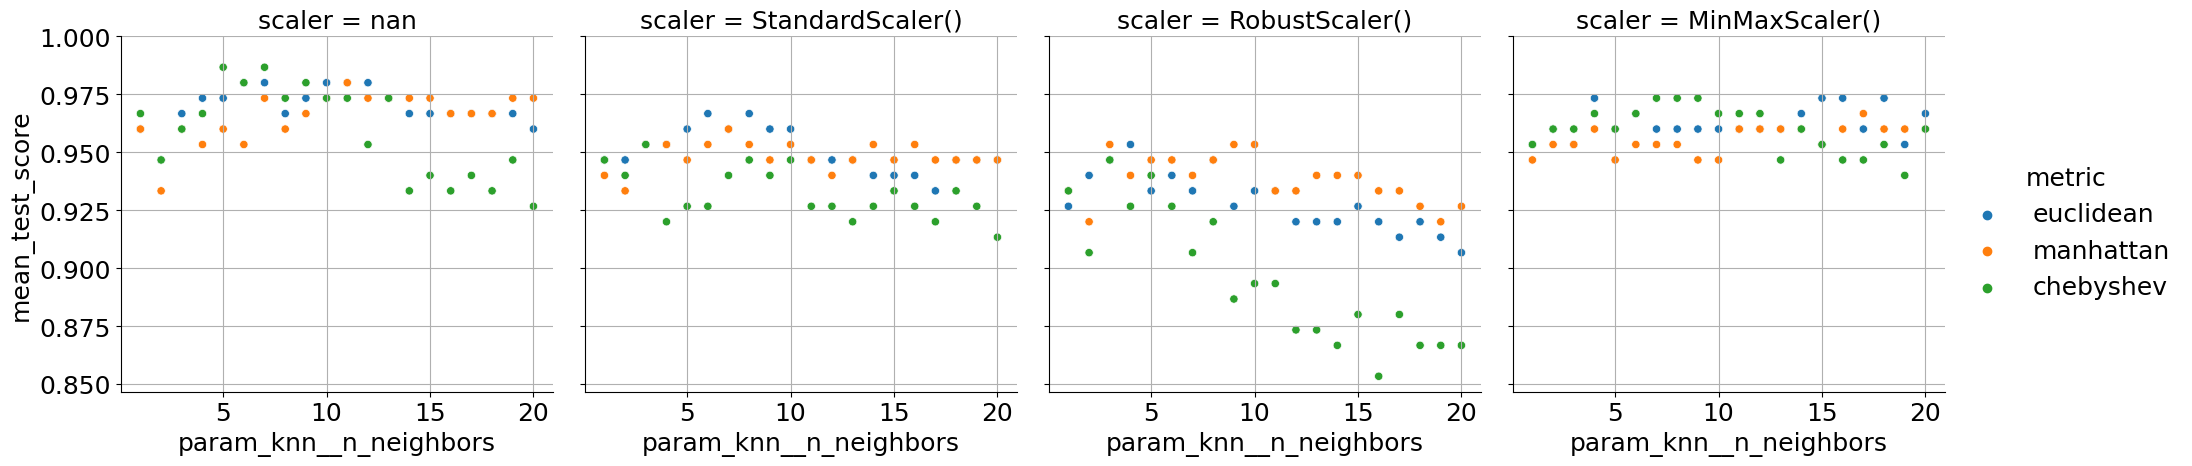

In [53]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import seaborn as sns

pipe = Pipeline([
    ('scaler', None),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'scaler': [None, StandardScaler(), RobustScaler(), MinMaxScaler()],
    'knn__n_neighbors': range(1, 21),
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev']
}

clf_grid = GridSearchCV(pipe, param_grid=param_grid)
clf_grid.fit(X, y)

out = pd.DataFrame.from_dict(clf_grid.cv_results_)
out["metric"]=out["param_knn__metric"].apply(pd.Series).astype(str)
out["scaler"]=out["param_scaler"].apply(pd.Series).astype(str)

g = sns.relplot(data = out, x = "param_knn__n_neighbors", y = "mean_test_score", hue='metric', col='scaler')
g.set(ylim=(None, 1))

nn_opt = out.loc[out['mean_test_score'].idxmax(), 'param_knn__n_neighbors']
print(f"Best nn is {nn_opt}")

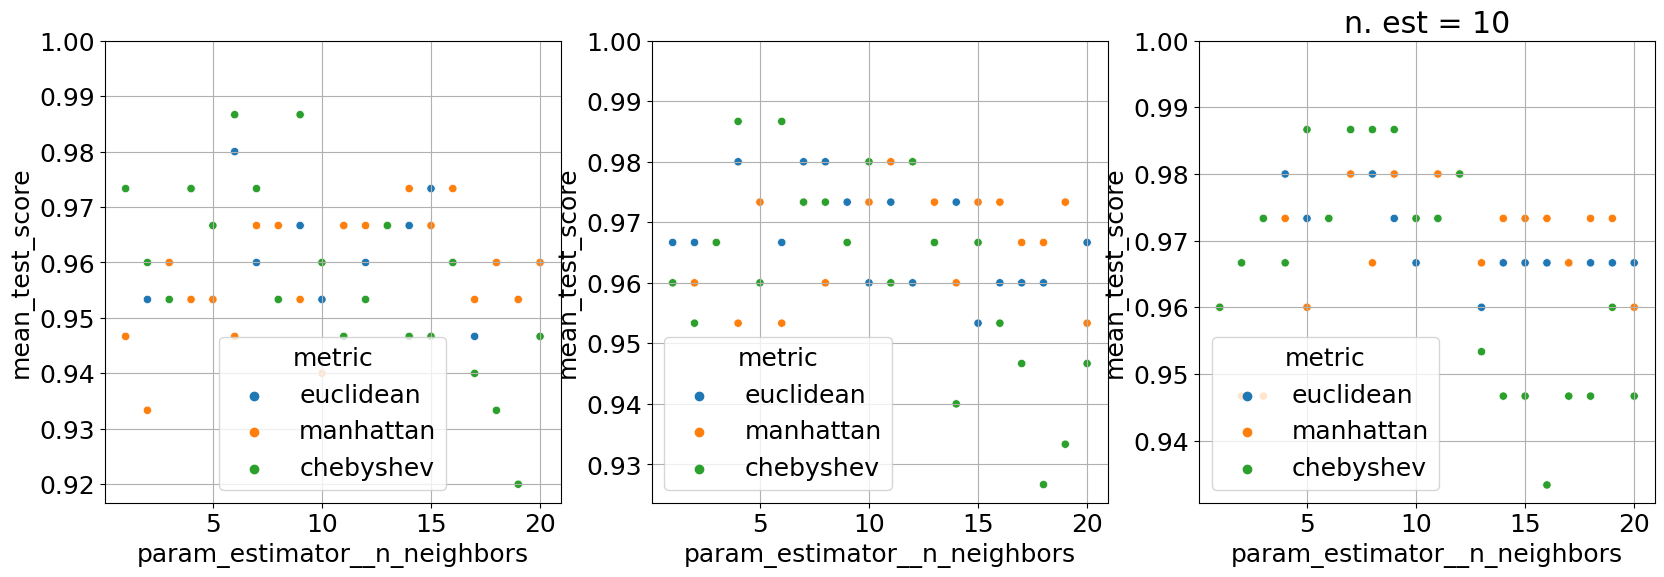

In [54]:
from sklearn.metrics import DistanceMetric

est_list = [2, 5, 10]


fig, ax = plt.subplots(ncols=len(est_list), figsize = (20, 6))
for i, num_est in enumerate(est_list):
    clf = BaggingClassifier(KNeighborsClassifier(), n_estimators=num_est)

    param_grid = {
        'estimator__n_neighbors': range(1, 21),
        'estimator__metric': ['euclidean', 'manhattan', 'chebyshev']
    }

    clf = BaggingClassifier(KNeighborsClassifier(), n_estimators=num_est)

    clf_grid = GridSearchCV(clf, param_grid=param_grid)
    clf_grid.fit(X, y)

    out = pd.DataFrame.from_dict(clf_grid.cv_results_)
    out["metric"]=out["param_estimator__metric"].apply(pd.Series).astype(str)

    
    g = sns.scatterplot(data = out, x = "param_estimator__n_neighbors", y = "mean_test_score", hue='metric', ax=ax[i])
    g.set(ylim=(None, 1))
    plt.title(f'n. est = {num_est}')

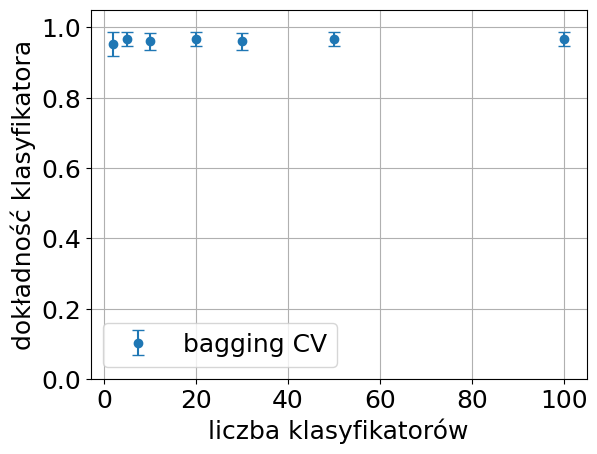

In [55]:
est_list = [2, 5, 10, 20, 30, 50, 100]

grid_params = {"n_estimators": est_list}
clf_bag = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=2))
clf_grid = GridSearchCV(estimator=clf_bag, param_grid=grid_params)
clf_grid.fit(X, y)

plt.errorbar(grid_params["n_estimators"], clf_grid.cv_results_["mean_test_score"], clf_grid.cv_results_["std_test_score"], fmt="o", capsize=4, label = "bagging CV")
plt.ylim(0, 1.05)
plt.xlabel("liczba klasyfikatorów")
plt.ylabel("dokładność klasyfikatora")
plt.legend()
plt.show()